# Lab 2-1: Hypothesis Testing



---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Filepath to our excel file.
skykomish_data_file = '../data/Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx'

# Use pandas.read_excel() function to open this file.
skykomish_data = pd.read_excel(skykomish_data_file)

---
To start, let's split the data in two:

In [3]:
# Divide the data into the early period (before 1975) and late period (after and including 1975). 

skykomish_before = skykomish_data[ skykomish_data['water year'] < 1975 ]
skykomish_after = skykomish_data[ skykomish_data['water year'] >= 1975 ]

---
Visually compare the distributions of the data, before and after 1975, with theoretical distributions, and random numbers generated from theoretical distributions.

In [4]:
### Method 1
# This function requires that the input is a pandas dataframe, with column names, and an integer index
# It returns a copy of the dataframe with an extra column added that has the Cunnane plotting positions
def cunnane_quantile(df, column_name):
    '''This function will compute the Cunnane plotting position for the values in a column of a dataframe.
    It requres a pandas dataframe, and the column name of interest (a text string) as inputs.
    The output is a new dataframe, ranked (sorted) with an extra column with the plotting position.
    [Steven Pestana, spestana@uw.edu, Oct. 2020]'''
    
    # Rank all our values
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    
    # Calculate the Cunnane plotting position
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) / (ranked_df[column_name].count() + (1/5))
        
    return ranked_df

### Method 2
# This function should be able to accept any one-dimensional numpy array or list, of numbers
# It returns two numpy arrays, one of the sorted numbers, the other of the plotting position
def cunnane_quantile_array(numbers):
    '''This function also computes the Cunnane plotting position given an array or list of numbers (rather than a pandas dataframe).
    It has two outputs, first the sorted numbers, second the Cunnane plotting position for each of those numbers.
    [Steven Pestana, spestana@uw.edu, Oct. 2020]'''
    
    # 1) sort the data, using the numpy sort function (np.sort())
    sorted_numbers = np.sort(numbers)
    
    # length of the list of numbers
    n = len(sorted_numbers) 
    
    # make an empty array, of the same length. below we will add the plotting position values to this array
    cunnane_plotting_position = np.empty(n)
    
    # 2) compute the Cunnane plotting position for each number, using a for loop and the enumerate function
    for rank, number in enumerate(sorted_numbers):
        cunnane_plotting_position[rank] = ( (rank+1) - (2/5) ) / ( n + (1/5) )
    
    return sorted_numbers, cunnane_plotting_position

#### Compare the empirical CDF with a theoretical **normal distribution**, and random samples from a normal distribution

In [5]:
# Use the cunnane quantile function for before 1975
skykomish_before_b = cunnane_quantile(skykomish_before, 'peak value (cfs)')

# Create theoretical normal CDF based on our sample values before 1975
values_cdf_b = np.linspace(0,skykomish_before_b['peak value (cfs)'].max(),100) # create 100 linearly spaced values between 0 and the maximum in our dataset
theoretical_cdf_b = stats.norm.cdf(values_cdf_b,
                                   skykomish_before_b['peak value (cfs)'].mean(),
                                   skykomish_before_b['peak value (cfs)'].std(ddof=1))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_normal_b = np.random.normal(skykomish_before_b['peak value (cfs)'].mean(),
                                   skykomish_before_b['peak value (cfs)'].std(ddof=1),
                                   size=skykomish_before_b['peak value (cfs)'].count())

# Compute the Cunnane plotting position for the random numbers
random_sorted_b, random_quantiles_b  = cunnane_quantile_array(random_normal_b)

In [6]:
# Use the cunnane quantile function for after 1975
skykomish_after_a = cunnane_quantile(skykomish_after, 'peak value (cfs)')

# Create theoretical normal CDF based on our sample values before 1975
values_cdf_a = np.linspace(0,skykomish_before_b['peak value (cfs)'].max(),100) # create 100 linearly spaced values between 0 and the maximum in our dataset
theoretical_cdf_a = stats.norm.cdf(values_cdf_a,
                                   skykomish_after_a['peak value (cfs)'].mean(),
                                   skykomish_after_a['peak value (cfs)'].std(ddof=1))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_normal_a = np.random.normal(skykomish_after_a['peak value (cfs)'].mean(),
                                   skykomish_after_a['peak value (cfs)'].std(ddof=1),
                                   size=skykomish_after_a['peak value (cfs)'].count())

# Compute the Cunnane plotting position for the random numbers
random_sorted_a, random_quantiles_a  = cunnane_quantile_array(random_normal_a)

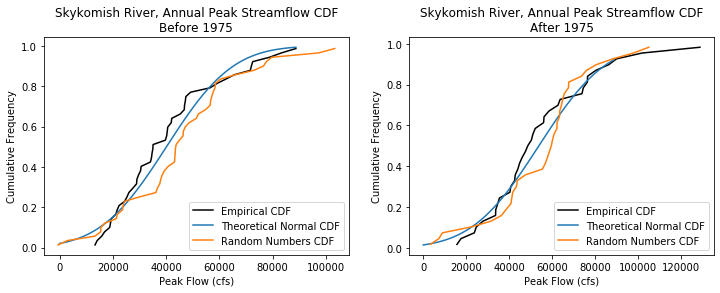

In [7]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Before 1975
# Empirical CDF
ax1.plot(skykomish_before_b['peak value (cfs)'], skykomish_before_b['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax1.plot(values_cdf_b, theoretical_cdf_b, label='Theoretical Normal CDF')
# Random numbers CDF from a theoretical normal distribution
ax1.plot(random_sorted_b,random_quantiles_b,'-', label='Random Numbers CDF')
# Add legend and labels
ax1.legend()
ax1.set_ylabel('Cumulative Frequency')
ax1.set_xlabel('Peak Flow (cfs)')
ax1.set_title('Skykomish River, Annual Peak Streamflow CDF\nBefore 1975')

# After 1975
# Empirical CDF
ax2.plot(skykomish_after_a['peak value (cfs)'], skykomish_after_a['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax2.plot(values_cdf_a, theoretical_cdf_a, label='Theoretical Normal CDF')
# Random numbers CDF from a theoretical normal distribution
ax2.plot(random_sorted_a, random_quantiles_a,'-', label='Random Numbers CDF')
# Add legend and labels
ax2.legend()
ax2.set_ylabel('Cumulative Frequency')
ax2.set_xlabel('Peak Flow (cfs)')
ax2.set_title('Skykomish River, Annual Peak Streamflow CDF\nAfter 1975');

Does the streamflow data look normally distributed? Maybe try changing the above code to compare the empirical CDFs against theoretical lognormal distributions. (Remember to transform the mean and standard deviations into "log space")

---

#### Compare the empirical CDF with a theoretical **lognormal distribution**, and random samples from a lognormal distribution

For the mean: $\mu_{log} = log\Bigg(\displaystyle\frac{\mu^2}{\sqrt{(\mu^2+\sigma^2)}}\Bigg)$

For the standard deviation: $\sigma_{log} = \sqrt{ log\Bigg(1+\displaystyle\frac{\sigma^2}{\mu^2}\Bigg) }$

Note that in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) for the `scipy.stats.lognorm.cdf()` function, it requires the following parameters:

`x` = the values (along the x-axis) we want to compute the CDF on (below I create a linearly spaced array of 100 values from 0 to the maximum value in our dataset)

`s` = the "log transformed" standard deviation, $\sigma_{log}$

`loc` = the "log transformed" mean, $\mu_{log}$ (also known as the "location")

`scale` =  $e^{\mu_{log}}$ (also known as the "scale"), you can use the `np.exp()` function

In [8]:
# Use the cunnane quantile function for before 1975
skykomish_before_b = cunnane_quantile(skykomish_before, 'peak value (cfs)')

# Get the mean and standard deviation of the original data
mu = skykomish_before_b['peak value (cfs)'].mean()
sigma = skykomish_before_b['peak value (cfs)'].std(ddof=1)
# Calculate the "log transformed" mean and standard deviation
mu_log = np.log( mu**2 / np.sqrt(mu**2 + sigma**2) )
sigma_log = np.sqrt( np.log( 1 + sigma**2/mu**2) )

# Create theoretical normal CDF based on our sample values before 1975
values_cdf_b = np.linspace(0,skykomish_before_b['peak value (cfs)'].max(),100) # create 100 linearly spaced values between 0 and the maximum in our dataset
theoretical_cdf_b = stats.lognorm.cdf(values_cdf_b,
                                      sigma_log,
                                      mu_log,
                                      np.exp( mu_log ))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_lognormal_b = np.random.lognormal(mu_log,
                                         sigma_log,
                                         size=skykomish_before_b['peak value (cfs)'].count())

# Compute the Cunnane plotting position for the random numbers
random_sorted_b, random_quantiles_b  = cunnane_quantile_array(random_lognormal_b)

In [9]:
# Use the cunnane quantile function for after 1975
skykomish_after_a = cunnane_quantile(skykomish_after, 'peak value (cfs)')

# Get the mean and standard deviation of the original data
mu = skykomish_after_a['peak value (cfs)'].mean()
sigma = skykomish_after_a['peak value (cfs)'].std(ddof=1)
# Calculate the "log transformed" mean and standard deviation
mu_log = np.log( mu**2 / np.sqrt(mu**2 + sigma**2) )
sigma_log = np.sqrt( np.log( 1 + sigma**2/mu**2) )

# Create theoretical normal CDF based on our sample values after 1975
values_cdf_a = np.linspace(0,skykomish_after_a['peak value (cfs)'].max(),100) # create 100 linearly spaced values between 0 and the maximum in our dataset
theoretical_cdf_a = stats.lognorm.cdf(values_cdf_a,
                                      sigma_log,
                                      mu_log,
                                      np.exp( mu_log ))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_lognormal_a = np.random.lognormal(mu_log,
                                         sigma_log,
                                         size=skykomish_after_a['peak value (cfs)'].count())

# Compute the Cunnane plotting position for the random numbers
random_sorted_a, random_quantiles_a  = cunnane_quantile_array(random_lognormal_a)

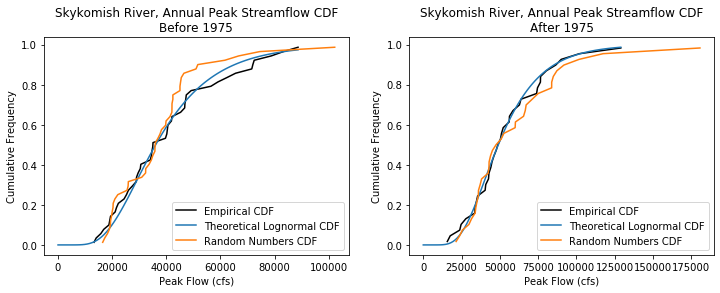

In [10]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Before 1975
# Empirical CDF
ax1.plot(skykomish_before_b['peak value (cfs)'], skykomish_before_b['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax1.plot(values_cdf_b, theoretical_cdf_b, label='Theoretical Lognormal CDF')
# Random numbers CDF from a theoretical normal distribution
ax1.plot(random_sorted_b,random_quantiles_b,'-', label='Random Numbers CDF')
# Add legend and labels
ax1.legend()
ax1.set_ylabel('Cumulative Frequency')
ax1.set_xlabel('Peak Flow (cfs)')
ax1.set_title('Skykomish River, Annual Peak Streamflow CDF\nBefore 1975')

# After 1975
# Empirical CDF
ax2.plot(skykomish_after_a['peak value (cfs)'], skykomish_after_a['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax2.plot(values_cdf_a, theoretical_cdf_a, label='Theoretical Lognormal CDF')
# Random numbers CDF from a theoretical normal distribution
ax2.plot(random_sorted_a, random_quantiles_a,'-', label='Random Numbers CDF')
# Add legend and labels
ax2.legend()
ax2.set_ylabel('Cumulative Frequency')
ax2.set_xlabel('Peak Flow (cfs)')
ax2.set_title('Skykomish River, Annual Peak Streamflow CDF\nAfter 1975');